In [46]:
from pathlib import Path

import pandas as pd
import petl as etl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline

In [47]:
ROOT = Path('../..')

SRC_FILE = ROOT / 'data/raw/lfs_by_pcon.csv'

OUT_DIR = ROOT / 'data/processed/labour-market/'
OUT_DIR.mkdir(parents=True, exist_ok=True)

OUT_FILE = OUT_DIR / 'labour_market_by_pcon.csv'
PQ_FILE = OUT_DIR / 'labour_market_by_pcon.parquet'

Load the latest CSV. This is downloaded by the 'download-from-nomis-api.py' script.

In [48]:
data = etl.fromcsv(
  SRC_FILE
).convert(
  'DATE', etl.dateparser('%Y-%m')
).convert(
  'OBS_VALUE', float
).selecteq(
  'MEASURES_NAME', 'Variable'
).selectin(
  'GEOGRAPHY_TYPE', ['parliamentary constituencies 2010', 'Westminster Parliamentary Constituencies (July 2024)']
).cut(
  'DATE', 'DATE_NAME', 'GEOGRAPHY_CODE', 'GEOGRAPHY_NAME', 'VARIABLE_CODE', 'VARIABLE_NAME', 'OBS_VALUE', 'OBS_STATUS_NAME'
).rename({
  'DATE': 'date',
  'DATE_NAME': 'date_name',
  'GEOGRAPHY_CODE': 'geography_code',
  'GEOGRAPHY_NAME': 'geography_name',
  'VARIABLE_CODE': 'variable_code',
  'VARIABLE_NAME': 'variable_name',
  'OBS_VALUE': 'value',
  'OBS_STATUS_NAME': 'notes'
})

data

date,date_name,geography_code,geography_name,variable_code,variable_name,value,notes
2022-03-01,Apr 2021-Mar 2022,E14000554,Berwick-upon-Tweed,18,Economic activity rate - aged 16-64,73.6,Normal Value
2022-03-01,Apr 2021-Mar 2022,E14000569,Bishop Auckland,18,Economic activity rate - aged 16-64,69.1,Normal Value
2022-03-01,Apr 2021-Mar 2022,E14000574,Blaydon,18,Economic activity rate - aged 16-64,80.6,Normal Value
2022-03-01,Apr 2021-Mar 2022,E14000575,Blyth Valley,18,Economic activity rate - aged 16-64,76.5,Normal Value
2022-03-01,Apr 2021-Mar 2022,E14000641,City of Durham,18,Economic activity rate - aged 16-64,71.5,Normal Value


Save the file to CSV

In [49]:
data.tocsv(OUT_FILE)

Convert to pandas for further processing, and save Parquet file

In [50]:
frame = data.todataframe()
frame.date = pd.to_datetime(frame.date)
frame.to_parquet(PQ_FILE)

Check missing data

date,2022-03-01,2022-06-01,2022-09-01,2022-12-01,2023-03-01,2023-06-01,2023-09-01,2023-12-01,2024-03-01
variable_name,,,,,,,,,
% of economically inactive student,0.905616,0.902496,0.884555,0.865055,0.821373,0.787051,0.735569,0.725429,0.726209
% who are economically inactive - aged 16+,0.985959,0.985959,0.985959,0.985959,0.985959,0.985959,0.985959,0.985959,0.985959
% who are economically inactive - aged 16-19,0.861154,0.836973,0.822153,0.783931,0.740250,0.705148,0.649766,0.624805,0.635725
% who are economically inactive - aged 16-24,0.933697,0.921997,0.912637,0.886115,0.865835,0.829953,0.785491,0.770671,0.773011
% who are economically inactive - aged 16-64,0.985959,0.985959,0.985959,0.985959,0.985959,0.985959,0.985179,0.984399,0.982839
% who are economically inactive - aged 20-24,0.381435,0.358814,0.346334,0.342434,0.329953,0.287832,0.251950,0.222309,0.204368
Economic activity rate - aged 16-19,0.654446,0.661466,0.662246,0.608424,0.574103,0.532761,0.471919,0.445398,0.445398
Economic activity rate - aged 16-64,0.985959,0.985959,0.985959,0.985959,0.985959,0.985959,0.985959,0.985959,0.985959
Economic activity rate - aged 20-24,0.901716,0.878315,0.866615,0.839314,0.805772,0.776911,0.726209,0.693448,0.697348


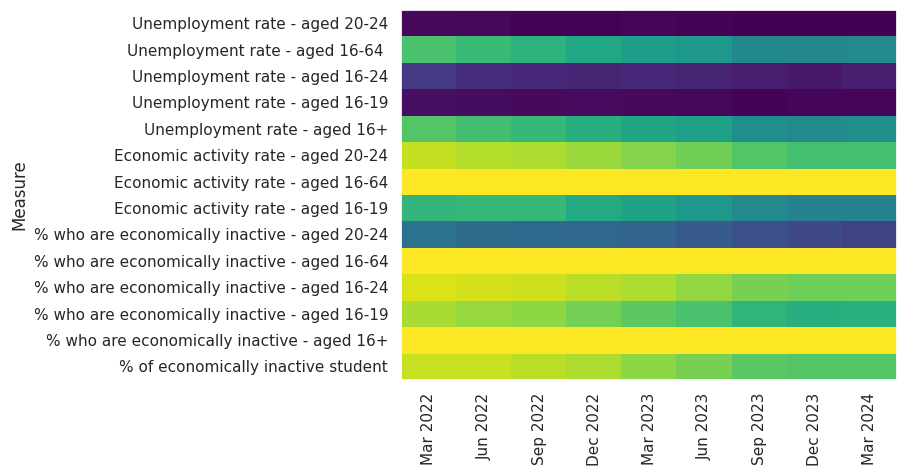

In [51]:
def visualise_coverage(data):
    counts = pd.DataFrame({
      'available': data.groupby(['date', 'variable_name']).value.count(),
      'total': data.groupby(['date', 'variable_name']).value.size()
    })
    coverage = pd.Series(
      counts.available / counts.total, name='coverage'
    ).reset_index().pivot(
      index='variable_name', columns='date', values='coverage'
    )
    plt.imshow(coverage, origin='lower', cmap='viridis', interpolation='nearest', aspect='auto')
    plt.grid(None)
    plt.ylabel('Measure')
    plt.yticks(ticks=range(len(coverage.index)), labels=coverage.index)
    plt.xticks(ticks=range(len(coverage.columns)), labels=coverage.columns.to_series().dt.strftime('%b %Y'), rotation=90, horizontalalignment='center')
    return coverage

frame.pipe(visualise_coverage)

Get the most recently published data per area, to increase coverage

In [52]:
def get_latest_available(data):
  # Calculate dates
  failsafe_date = data.date.min() - pd.Timedelta("1 days")
  latest_date = data.date.max()
  # Subset the input data
  test_data = data.loc[:, ['geography_code', 'date', 'variable_name', 'value']]
  # Construct a failsafe (to be used in the event that there is no data available)
  # This will have the same index as the most recent values, which we use below...
  failsafe_data = test_data.loc[test_data.date == latest_date]
  failsafe_data.loc[:, ['date', 'value']] = (failsafe_date, -1)
  # Concatenate the test and failsafe_data
  test_data = pd.concat([ test_data, failsafe_data ]).sort_values('date', ascending=True)
  # Get the indexes for the non-zero values
  indexes = test_data.dropna(subset='value').groupby(['geography_code', 'variable_name'])['date'].idxmax()
  return data.loc[indexes]

latest_available = frame.pipe(get_latest_available)

In [53]:
latest = frame.loc[frame.date == frame.date.max()].groupby(['variable_name']).value
patched = latest_available.groupby(['variable_name']).value
coverage = pd.DataFrame({
  'latest coverage': latest.count() / latest.size() * 100,
  'patched coverage': patched.count() / patched.size() * 100,
})

coverage

,latest coverage,patched coverage
variable_name,,
% of economically inactive student,72.620905,97.337510
% who are economically inactive - aged 16+,98.595944,98.584906
% who are economically inactive - aged 16-19,63.572543,96.241190
% who are economically inactive - aged 16-24,77.301092,98.042287
% who are economically inactive - aged 16-64,98.283931,98.590446
% who are economically inactive - aged 20-24,20.436817,58.653093
Economic activity rate - aged 16-19,44.539782,86.296006
Economic activity rate - aged 16-64,98.595944,98.590446
Economic activity rate - aged 20-24,69.734789,97.102584


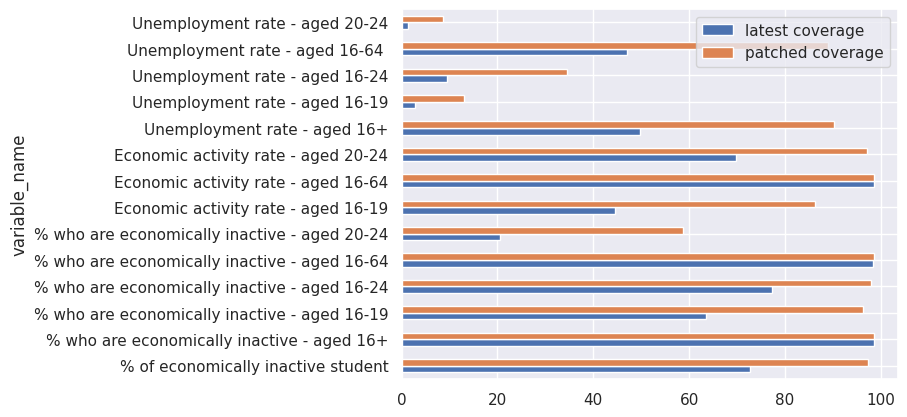

In [54]:
ax = coverage.plot.barh()